In [1]:
#1. Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [2]:
# 2. Read the data file and show the data
df = pd.read_csv('/Users/mac/Documents/HK6/IS403.PTDL KD/đồ án main/code/Data_stock_SCS_VN.csv')
df

,time,open,high,low,close,volume
0,2019-03-01,59960,59960,59920,59960,34010
1,2019-03-04,59960,60080,58980,59960,8580
2,2019-03-05,58720,60010,58720,59960,35720
3,2019-03-06,59960,60130,59960,59960,9290
4,2019-03-07,59960,60400,59960,60330,19290
...,...,...,...,...,...,...
1248,2024-02-23,75000,75400,73600,73800,91600
1249,2024-02-26,74000,75500,73800,75400,95900
1250,2024-02-27,75400,76000,74000,74700,39400
1251,2024-02-28,74500,75700,74500,75500,63500


In [3]:
# 3. Divide the train:test at a ratio of 7:3
df = df[['close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing
train_size = int(0.7 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]

In [4]:
# 4. Training process
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['close'])

# Train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [5]:
# 5. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['close'])
y_pred = model.predict(x_test)  

In [6]:
# 6. The process of creating index predict the next 30, 60, 90 days
last_index = df.index[-1]

# Create arrays of consecutive integers starting from last_index for 30, 60, and 90 days
x_next_30_days = np.array(range(last_index + 1, last_index + 31)).reshape(-1, 1)
x_next_60_days = np.array(range(last_index + 1, last_index + 61)).reshape(-1, 1)
x_next_90_days = np.array(range(last_index + 1, last_index + 91)).reshape(-1, 1)

# Predict the closing prices for the next 30, 60, and 90 days
y_next_30_days = model.predict(x_next_30_days)
y_next_60_days = model.predict(x_next_60_days)
y_next_90_days = model.predict(x_next_90_days)

# Print the predicted closing prices for the next 30, 60, 90 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)
print('Predicted closing prices for the next 60 days:')
print(y_next_60_days)
print('Predicted closing prices for the next 90 days:')
print(y_next_90_days)


Predicted closing prices for the next 30 days:
[78950.91655904 78970.61402016 78990.31148128 79010.0089424
 79029.70640352 79049.40386463 79069.10132575 79088.79878687
 79108.49624799 79128.19370911 79147.89117023 79167.58863135
 79187.28609247 79206.98355359 79226.68101471 79246.37847583
 79266.07593695 79285.77339807 79305.47085918 79325.1683203
 79344.86578142 79364.56324254 79384.26070366 79403.95816478
 79423.6556259  79443.35308702 79463.05054814 79482.74800926
 79502.44547038 79522.1429315 ]
Predicted closing prices for the next 60 days:
[78950.91655904 78970.61402016 78990.31148128 79010.0089424
 79029.70640352 79049.40386463 79069.10132575 79088.79878687
 79108.49624799 79128.19370911 79147.89117023 79167.58863135
 79187.28609247 79206.98355359 79226.68101471 79246.37847583
 79266.07593695 79285.77339807 79305.47085918 79325.1683203
 79344.86578142 79364.56324254 79384.26070366 79403.95816478
 79423.6556259  79443.35308702 79463.05054814 79482.74800926
 79502.44547038 79522.14

In [7]:
# 7. Evaluate the model
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error
import numpy as np

# Calculate RMSE 
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
mape_test = mean_absolute_percentage_error(y_test, y_pred)

# Calculate MLSE 
msle_test = mean_squared_log_error(y_test, y_pred)


print("RMSE:", rmse_test)
print("MAPE:", mape_test, "%")
print("MSLE:", msle_test)

RMSE: 10626.336284843874
MAPE: 15.533855803616204 %
MSLE: 0.02325923684580007


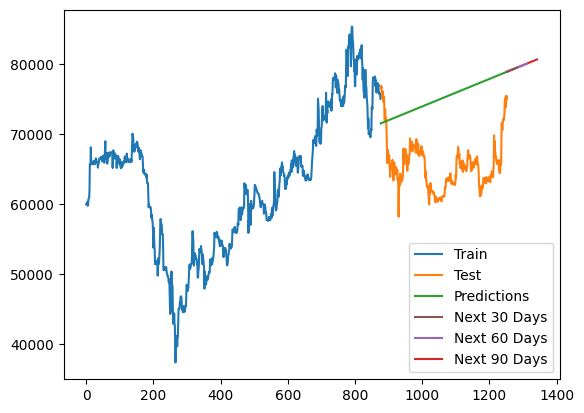

In [8]:
# 8.Plot the results
line1, = plt.plot(train_data.index, train_data['close'], label='Train')
line2, = plt.plot(test_data.index, test_data['close'], label='Test')
line3, = plt.plot(test_data.index, y_pred, label='Predictions')
line4, = plt.plot(range(last_index + 1, last_index + 91), y_next_90_days, label='Next 90 Days')
line5, = plt.plot(range(last_index + 1, last_index + 61), y_next_60_days, label='Next 60 Days')
line6, = plt.plot(range(last_index + 1, last_index + 31), y_next_30_days, label='Next 30 Days')
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.show()